In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
df=pd.read_csv('Salary_Data.csv')

In [171]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [175]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


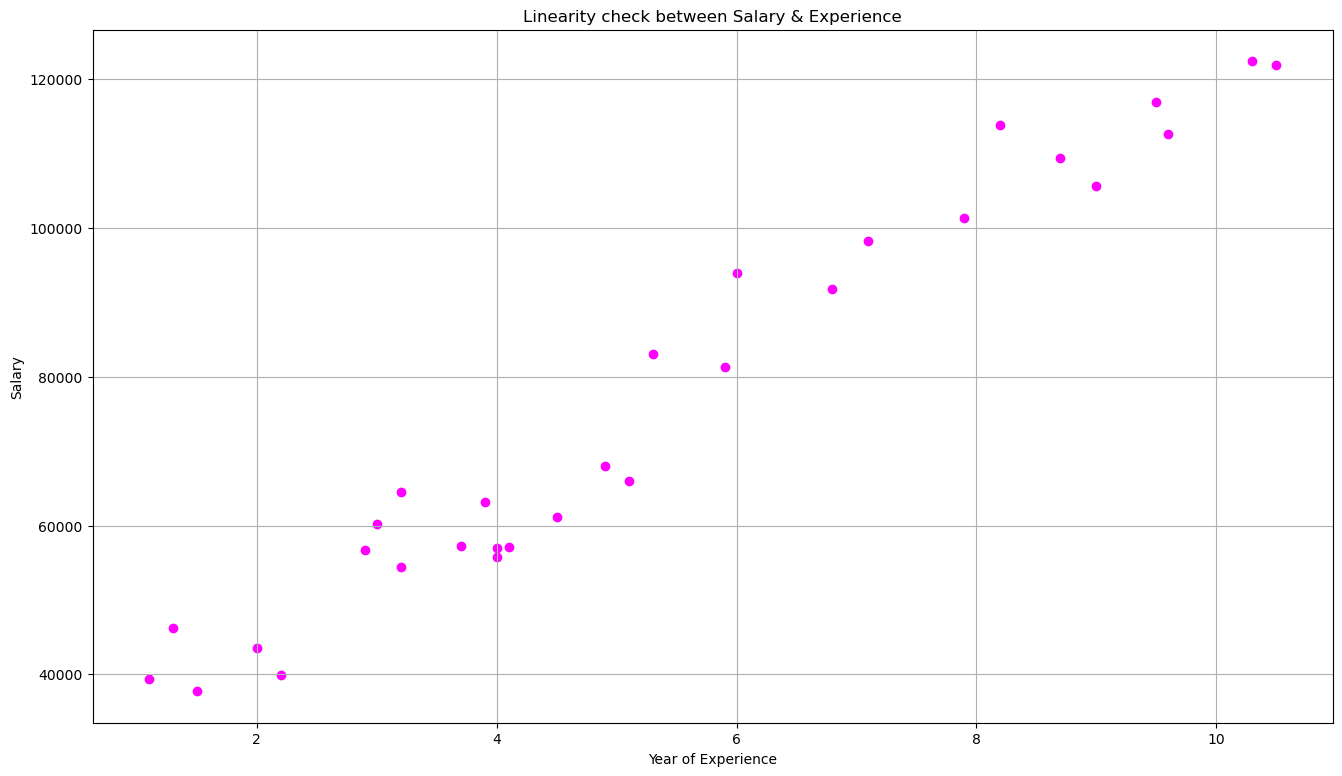

In [177]:
plt.figure(figsize=(16,9))
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.title('Linearity check between Salary & Experience')
plt.scatter(df['YearsExperience'],df['Salary'],color='Magenta');
plt.grid();

In [179]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [181]:
x=df[['YearsExperience']]  #2d array
y=df['Salary']             #1d array

In [183]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [185]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [187]:
x.ndim

2

In [189]:
y.ndim

1

In [191]:
from sklearn.model_selection import train_test_split

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [195]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [197]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [199]:
lr.fit(x_train,y_train)

LinearRegression()

In [201]:
lr.coef_

array([9312.57512673])

In [203]:
lr.intercept_

26780.099150628157

In [205]:
#predict on test data and evaluate

In [207]:
y_pred=lr.predict(x_test)

In [209]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [211]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

In [213]:
df1=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})

In [215]:
df1

,Actual,Predicted
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


In [217]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

2446.172369046503

In [219]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.988169515729126

In [221]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

12823412.298126506

In [223]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,y_pred)

3580.979237321337

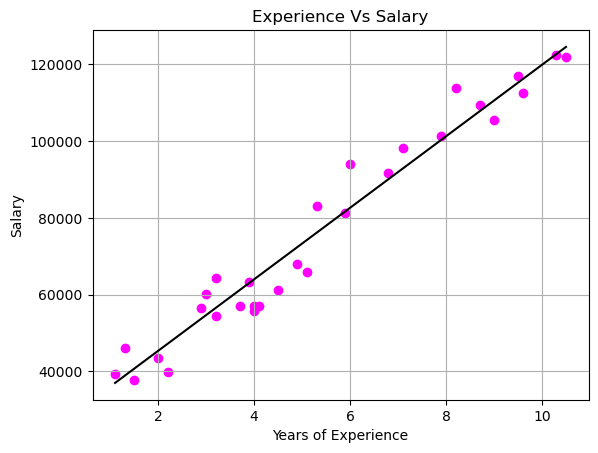

In [229]:
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience Vs Salary')
plt.scatter(df['YearsExperience'],df['Salary'],color='magenta')
plt.plot(x,lr.predict(x),color='black')
plt.grid()

# POLYNOMIAL REGRESSION

In [278]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [280]:
x_poly=poly.fit_transform(x)

In [282]:
x_poly

array([[  1.  ,   1.1 ,   1.21],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,   5.1 ,  26.01],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   6.8 ,  46.24],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   8.7 ,  75.69],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  10.5 , 110.25]])

In [284]:
poly_reg=LinearRegression()

In [286]:
poly_reg.fit(x_poly,y)

LinearRegression()

In [288]:
poly_reg.coef_

array([   0.        , 9259.2838882 ,   16.39256632])

In [290]:
poly_reg.intercept_

26214.932677059573

In [292]:
poly_reg.score(x_poly,y)

0.956975168321065

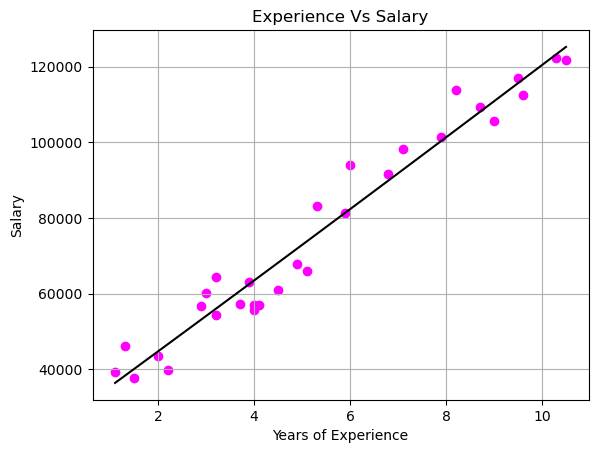

In [294]:
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience Vs Salary')
plt.scatter(df['YearsExperience'],df['Salary'],color='magenta')
plt.plot(x,poly_reg.predict(x_poly),color='black')
plt.grid()

In [ ]:
poly=PolynomialFeatures(degree=2)
for i in range(1,20):
    poly_reg=LinearRegression()
    